# Processed data

In [1]:
%reload_ext autoreload

%autoreload 2

import os

import iris
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray as xr

from ml_downscaling_emulator import UKCPDatasetMetadata
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree

## Vorticity

In [2]:
moose_dir = os.path.join(os.getenv("DERIVED_DATA"), "moose")
vort_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-4x", variable="vorticity850")

vort_ds = xr.open_mfdataset(vort_meta.existing_filepaths())
vort_ds

<xarray.Dataset>
Dimensions:                  (time: 1080, grid_latitude: 64,
                              grid_longitude: 64, bnds: 2)
Coordinates:
    pressure                 float32 850.0
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  (time) object 1979-09-01 00:00:00 ... 2059-09-01...
    realization              int32 1100000
  * time                     (time) object 1980-12-01 12:00:00 ... 2061-11-30...
  * grid_latitude            (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    grid_latitude_bnds       (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds      (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

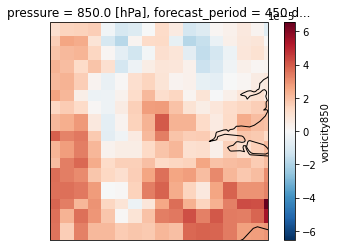

In [3]:
ax = plt.axes(projection=cp_model_rotated_pole)
vort_ds.isel(time=0)['vorticity850'].plot(ax=ax)
ax.coastlines()

(array([2.80000e+01, 2.40000e+01, 4.50000e+01, 3.05000e+02, 5.91000e+02,
        1.77400e+03, 4.38300e+03, 1.31580e+04, 3.28620e+04, 7.56950e+04,
        1.49258e+05, 2.52078e+05, 3.83165e+05, 5.14366e+05, 5.92893e+05,
        5.82553e+05, 5.22140e+05, 4.05765e+05, 2.87245e+05, 1.95150e+05,
        1.31809e+05, 8.93170e+04, 5.92870e+04, 4.19260e+04, 2.77050e+04,
        1.87740e+04, 1.22890e+04, 8.55500e+03, 4.42700e+03, 3.84100e+03,
        2.16000e+03, 2.20500e+03, 1.79400e+03, 1.03600e+03, 9.47000e+02,
        9.92000e+02, 9.35000e+02, 7.12000e+02, 5.36000e+02, 3.70000e+02,
        2.61000e+02, 1.20000e+02, 8.00000e+01, 4.80000e+01, 1.20000e+01,
        3.20000e+01, 2.00000e+01, 0.00000e+00, 0.00000e+00, 1.20000e+01]),
 array([-1.53877034e-04, -1.44177483e-04, -1.34477931e-04, -1.24778379e-04,
        -1.15078827e-04, -1.05379276e-04, -9.56797240e-05, -8.59801723e-05,
        -7.62806206e-05, -6.65810689e-05, -5.68815172e-05, -4.71819654e-05,
        -3.74824137e-05, -2.77828620e-05

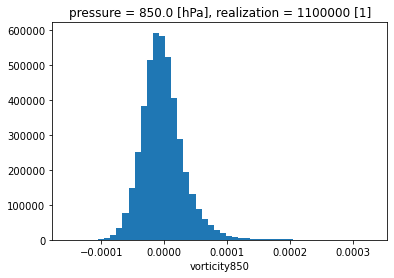

In [4]:
vort_ds['vorticity850'].plot(bins=50)

## Target Pr

In [5]:
pr_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km", variable="pr")

pr_ds = xr.open_mfdataset(pr_meta.existing_filepaths()).rename({pr_meta.variable: f'target_{pr_meta.variable}'})
pr_ds

<xarray.Dataset>
Dimensions:                     (time: 1080, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 2061-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 2059-09...
    realization                 int32 1100000
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    target_pr                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

(array([3.407327e+06, 3.619210e+05, 2.190550e+05, 1.320030e+05,
        8.941500e+04, 6.115300e+04, 4.172500e+04, 3.039100e+04,
        2.149600e+04, 1.589100e+04, 1.183400e+04, 8.070000e+03,
        5.708000e+03, 4.187000e+03, 2.994000e+03, 2.354000e+03,
        1.895000e+03, 1.346000e+03, 1.216000e+03, 9.600000e+02,
        6.890000e+02, 4.870000e+02, 3.860000e+02, 2.770000e+02,
        1.560000e+02, 1.720000e+02, 1.270000e+02, 7.800000e+01,
        5.900000e+01, 5.000000e+01, 5.100000e+01, 3.600000e+01,
        2.800000e+01, 2.600000e+01, 1.800000e+01, 1.800000e+01,
        1.200000e+01, 1.400000e+01, 1.000000e+01, 1.000000e+01,
        8.000000e+00, 5.000000e+00, 4.000000e+00, 6.000000e+00,
        5.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([0.0000000e+00, 2.7410002e-05, 5.4820004e-05, 8.2230006e-05,
        1.0964001e-04, 1.3705001e-04, 1.6446001e-04, 1.9187001e-04,
        2.1928002e-04, 2.4669000e-04, 2.7410002e-04, 3.015

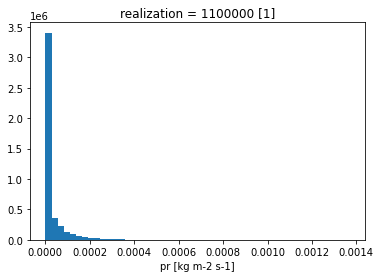

In [6]:
pr_ds['target_pr'].plot(bins=50)

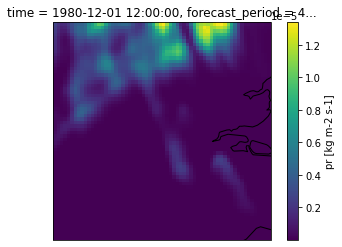

In [7]:
ax = plt.axes(projection=cp_model_rotated_pole)
pr_ds.isel(time=0)['target_pr'].plot(ax=ax)
ax.coastlines()

In [8]:
combined_ds = xr.combine_by_coords([vort_ds, pr_ds], compat='no_conflicts', combine_attrs="drop_conflicts", coords="all", join="inner", data_vars="all")
combined_ds = combined_ds.assign_coords(season=(('time'), (combined_ds['time.month'].data % 12 // 3)))
combined_ds

<xarray.Dataset>
Dimensions:                     (time: 1080, bnds: 2, grid_latitude: 64,
                                 grid_longitude: 64)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 ... 2061-11...
  * grid_latitude               (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude              (grid_longitude) float32 360.9 360.9 ... 362.1
    forecast_period             (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time     (time) object 1979-09-01 00:00:00 ... 2059-09...
    realization                 int32 1100000
    pressure                    float32 850.0
    season                      (time) int64 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  (time) int32 -2147483647 ... -2147483647
    time_bnds                   (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    grid_latitude_bnds          (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds         (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    forecast_period_bnds        (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
    target_pr                   (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    vorticity850                (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## Dataset (from sample)

In [37]:
splits = ["train", "val", "test"] #, "extreme_val", "extreme_test"]

data_splits = {split: xr.open_dataset(os.path.join(os.getenv("DERIVED_DATA"), "moose", "nc-datasets", "2.2km-coarsened-8x_london_random_london_8x_vorticity850_random", f"{split}.nc")) for split in splits}

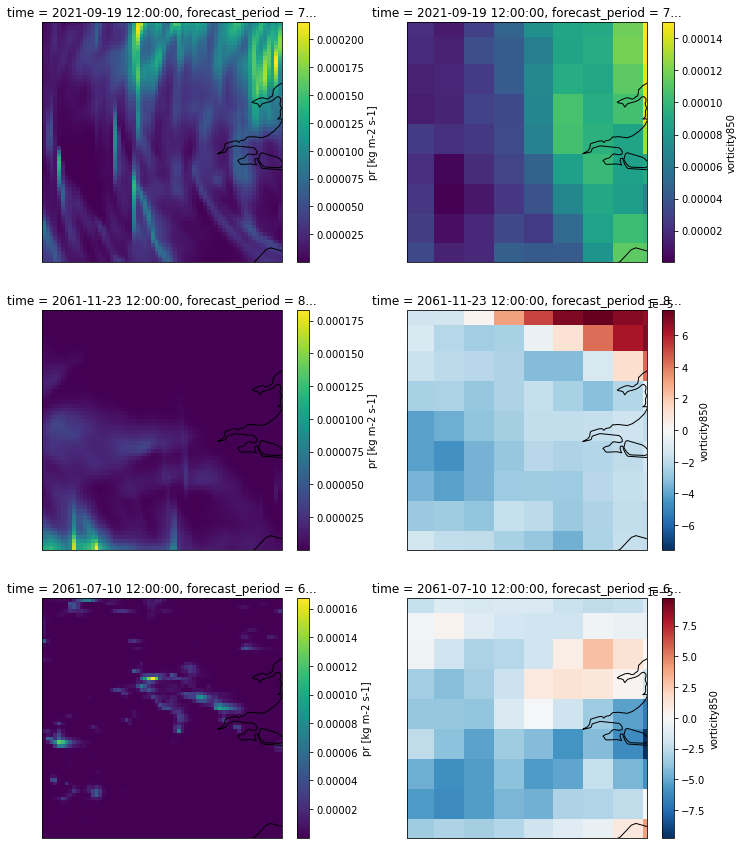

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15), subplot_kw=dict(projection=cp_model_rotated_pole))

for i, split in enumerate(splits):
    ts = np.random.choice(data_splits[split].time.values)
    
    ax=axes[i][0]
    data_splits[split].sel(time=ts)['target_pr'].plot(ax=ax)
    ax.coastlines()
    
    ax=axes[i][1]
    data_splits[split].sel(time=ts)['vorticity850'].plot(ax=ax)
    ax.coastlines()


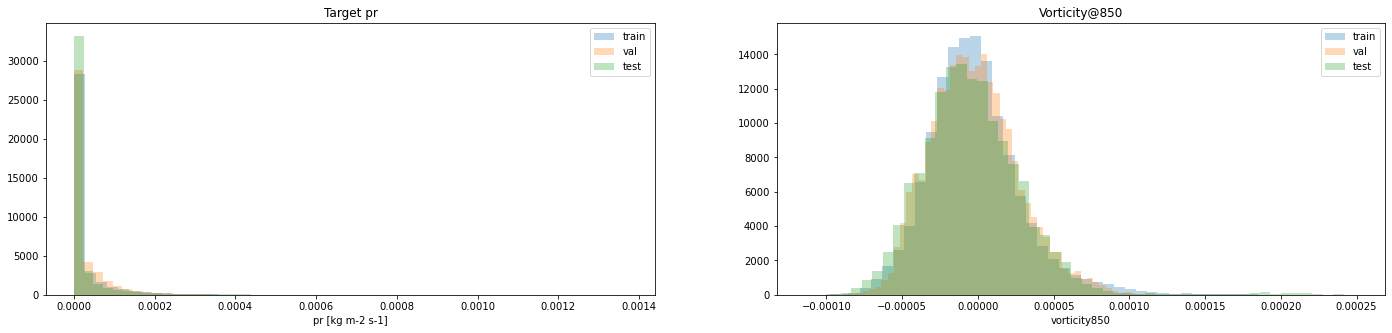

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 5))

for split in splits:
    data_splits[split]['target_pr'].plot(ax=axes[0], bins=50, density=True, alpha=0.3, label=split)
    data_splits[split]['vorticity850'].plot(ax=axes[1], bins=50, density=True, alpha=0.3, label=split)

axes[0].set_title("Target pr")
axes[1].set_title("Vorticity@850")
axes[0].legend()
axes[1].legend()